<a href="https://colab.research.google.com/github/HienNguyenMinh/PythonAssignment/blob/main/BaiTap2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# M5 EDA - Vẽ Các Biểu Đồ

**Tải các tệp dữ liệu từ Google Drive về Colab**

In [190]:
#Install gdown
!pip uninstall gdown -y && pip install gdown
#Tạo một folder "DataSet" trên Colab
!rm -rf /content/M5Forecasting
!mkdir M5Forecasting
#Tải các tệp dữ liệu lớn từ Google Drive
!gdown --folder https://drive.google.com/drive/folders/1YgxRFChKTJ5EHStqR_dNvJCd_2HibWll?usp=sharing -O /content/M5Forecasting


Found existing installation: gdown 4.5.3
Uninstalling gdown-4.5.3:
  Successfully uninstalled gdown-4.5.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached gdown-4.5.3-py3-none-any.whl
Retrieving folder list
Processing file 1nJoIt6-nl7YOgqusRLxUZTFgOa1EmsW0 calendar.csv
Processing file 1cuEGsxjYBISrMMq8d52um_MzGTZcqyTq sales_train_evaluation.csv
Processing file 1swX4_vKU7hl6wmLQjod_EUFf3ztNgdq2 sales_train_validation.csv
Processing file 1GCf2ElYJR4Z6tBFD1BbhrvQE75wvwB1Y sample_submission.csv
Processing file 1WVPd8CnbqF65IBT2gBxLBk4yyCiJ8Psg sell_prices.csv
Retrieving folder list completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1nJoIt6-nl7YOgqusRLxUZTFgOa1EmsW0
To: /content/M5Forecasting/calendar.csv
100% 103k/103k [00:00<00:00, 96.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cuEGsxjYBISrMMq8d52um_MzGTZcqyTq
To: /content/M5Foreca

In [191]:
# Import các thư viện cần thiết
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Kiểm tra các file dữ liệu *.csv được tải về Colab thông qua việc duyệt cây thư mục vừa được tải về Colab và in ra đường dẫn các file dữ liệu:
import os
for dirname, _, filenames in os.walk('/content/M5Forecasting'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/M5Forecasting/sample_submission.csv
/content/M5Forecasting/sales_train_validation.csv
/content/M5Forecasting/calendar.csv
/content/M5Forecasting/sales_train_evaluation.csv
/content/M5Forecasting/sell_prices.csv


In [192]:
#Đọc dữ liệu từ các file *.csv
sale2 = pd.read_csv('/content/M5Forecasting/sales_train_validation.csv')
cale4 = pd.read_csv('/content/M5Forecasting/calendar.csv')
prices = pd.read_csv('/content/M5Forecasting/sell_prices.csv')

In [193]:
#In 3 dòng dữ liệu đầu tiên trong dataframe
sale2.head(3)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1


**Đổi tên các cột của sale2 (sales_train_validation)**

Tên cột d_* đổi về ngày tương ứng


In [194]:
import datetime
#Bắt đầu từ ngày 29/1/2011
x = datetime.date(2011,1,29)
#Lặp qua các cột bắt đầu từ cột thứ 6 (d_1)
for c in ((sale2.columns)[6:]):
    #Rename cột với tên lấy từ x
    sale2.rename(columns={c:x},inplace=True)
    #Tăng lên 1 ngày cho để dùng cho cột kế tiếp
    x = x + datetime.timedelta(days=1)

#In 5 dòng dữ liệu đầu tiên
sale2.head()

,id,item_id,dept_id,cat_id,store_id,state_id,2011-01-29,2011-01-30,2011-01-31,2011-02-01,...,2016-04-15,2016-04-16,2016-04-17,2016-04-18,2016-04-19,2016-04-20,2016-04-21,2016-04-22,2016-04-23,2016-04-24
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


**Doanh số bán hàng của 5 item đầu tiên theo time series**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Unrecognized location 'left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  from ipykernel import kernelapp as app


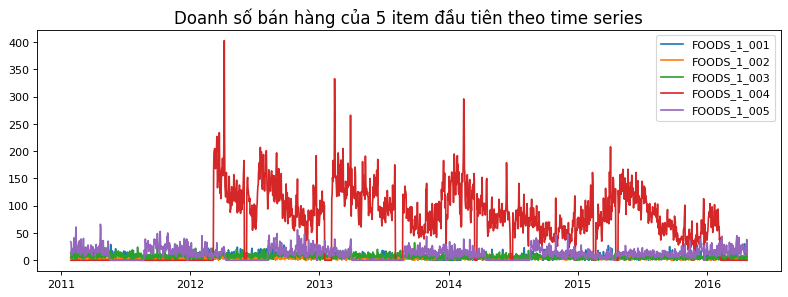

In [195]:
#Dataframe sale2: nhóm theo cột 'item_id', tính tổng doanh số hàng ngày từ cột[6] trở đến cột cuối
#Tạo dataframe sale2_temp, lấy dữ liệu đã tính toán của sale2 đổ vào sale2_temp
sale2_temp = sale2.groupby('item_id')[(sale2.columns)[6:]].sum()
#Tạo dataframe sale2_5first, lấy 5 dòng dữ liệu đầu tiên của sale2_temp
sale2_5first = sale2_temp[:5]

#Vẽ biểu đồ biểu diễn doanh số bán hàng của 5 item đầu tiên theo time series
import matplotlib.pyplot as plt
plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
#Lặp từ 0 đến 5 (len(sale2_temp.index) = 5)
for i in range(len(sale2_5first.index)):
    x = sale2_5first.iloc[i,:]
    label=sale2_5first.index[i]
    plt.plot(x,label = label)    
    plt.legend(loc='left')
plt.title('Doanh số bán hàng của 5 item đầu tiên theo time series', fontsize=15) 
plt.show()


**Tổng doanh số theo time series**

In [196]:
#In 5 dòng dữ liệu đầu tiên
sale2_temp.head()

,2011-01-29,2011-01-30,2011-01-31,2011-02-01,2011-02-02,2011-02-03,2011-02-04,2011-02-05,2011-02-06,2011-02-07,...,2016-04-15,2016-04-16,2016-04-17,2016-04-18,2016-04-19,2016-04-20,2016-04-21,2016-04-22,2016-04-23,2016-04-24
item_id,,,,,,,,,,,,,,,,,,,,,
FOODS_1_001,6,6,4,6,7,18,10,4,11,10,...,4,4,30,7,5,3,6,2,16,6
FOODS_1_002,4,5,7,4,3,4,1,7,2,4,...,5,9,4,1,3,5,5,3,3,1
FOODS_1_003,14,8,3,6,3,8,13,10,11,6,...,7,3,5,6,3,4,4,3,11,5
FOODS_1_004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FOODS_1_005,34,32,13,20,10,21,18,20,25,41,...,16,14,14,18,18,27,12,15,38,9


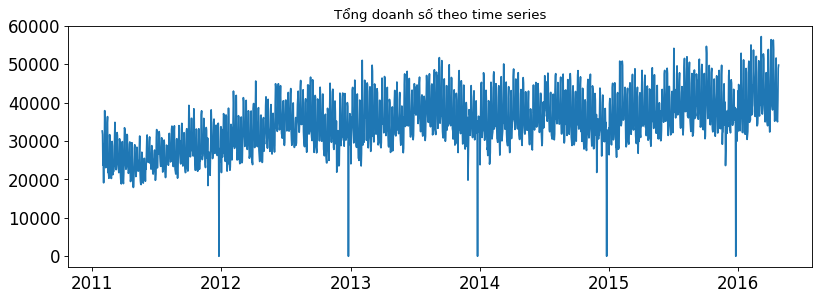

In [197]:
#Vẽ biểu đồ biểu diễn tổng doanh số theo time series
plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
#Tính tổng doanh số mỗi ngày và vẽ biểu đồ
(sale2_temp.sum()).plot(title = 'Tổng doanh số theo time series', fontsize=15)
plt.show()

**Doanh số hàng tháng ở các tiểu bang khác nhau**

In [198]:
sale2_temp = sale2
#Nhóm các cột cùng tháng cùng năm và tính tổng doanh số của tháng
sale2_temp = sale2_temp.groupby(sale2_temp.columns.map(lambda x : x if type(x) == str else x.strftime('%Y-%m')),axis=1).sum()
for c in ((sale2_temp.columns)[:-6]):
    x= datetime.datetime.strptime(c, '%Y-%m').date()
    sale2_temp.rename(columns={c:x},inplace=True)

sale2_temp.head()    

,2011-01-01,2011-02-01,2011-03-01,2011-04-01,2011-05-01,2011-06-01,2011-07-01,2011-08-01,2011-09-01,2011-10-01,...,2016-01-01,2016-02-01,2016-03-01,2016-04-01,cat_id,dept_id,id,item_id,state_id,store_id
0,0,0,0,0,0,0,0,0,0,0,...,24,29,29,26,HOBBIES,HOBBIES_1,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,CA,CA_1
1,0,0,0,0,0,3,5,10,7,8,...,4,5,10,1,HOBBIES,HOBBIES_1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,CA,CA_1
2,0,0,0,0,0,0,0,0,0,0,...,6,9,15,16,HOBBIES,HOBBIES_1,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,CA,CA_1
3,0,0,17,23,34,28,60,55,53,55,...,64,60,53,51,HOBBIES,HOBBIES_1,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,CA,CA_1
4,0,0,0,0,31,31,5,36,67,26,...,22,33,39,29,HOBBIES,HOBBIES_1,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,CA,CA_1


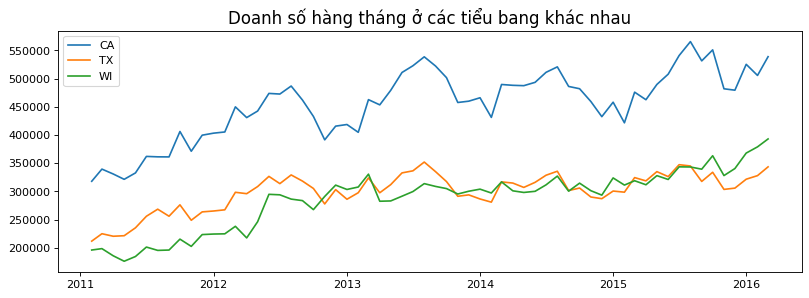

In [199]:
#Nhóm sale2_temp theo cột 'state_id', rồi tính tổng doanh số ở các cột từ cột đầu tiên và trừ 6 cột cuối
sale_City = sale2_temp.groupby(['state_id'])[(sale2_temp.columns)[:-6]].sum()
#Setting cho size, color của lưới biểu đồ
plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
#Vẽ biểu đồ 
for i in range(3):
    x = sale_City.iloc[i,1:-1]
    label = label=sale_City.index[i]
    plt.plot(x, label= label)
    plt.legend(loc='best')
plt.title ('Doanh số hàng tháng ở các tiểu bang khác nhau', fontsize=15)
plt.show()


**Tổng doanh số hàng tháng theo các danh mục khác nhau**

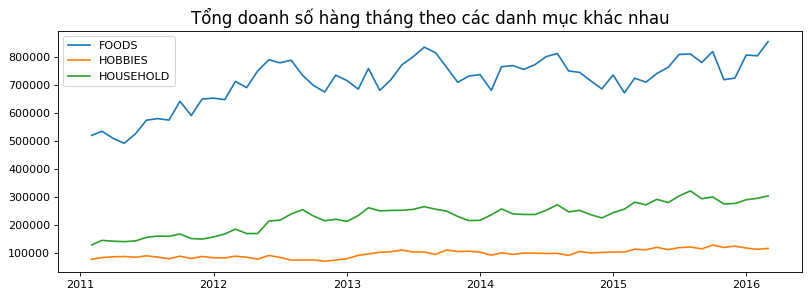

In [200]:
#Nhóm sale2_temp theo cột 'cat_id', rồi tính tổng doanh số ở các cột từ cột đầu tiên và trừ 6 cột cuối
sale_Cat = sale2_temp.groupby(['cat_id'])[(sale2_temp.columns)[:-6]].sum()
#Setting cho size, color của lưới biểu đồ
plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
#Vẽ biểu đồ 
for i in range(3):
    x = sale_Cat.iloc[i,1:-1]
    label=sale_Cat.index[i]
    plt.plot(x, label = label)
    plt.legend(loc='best')
plt.title('Tổng doanh số hàng tháng theo các danh mục khác nhau', fontsize=15)
plt.show()

**Tổng doanh số theo từng danh mục**

In [201]:
#Nhóm sale2_temp theo cột 'cat_id', rồi tính tổng doanh số ở các cột từ cột đầu tiên và trừ 6 cột cuối
sale_Cat = sale2_temp.groupby(['cat_id'])[(sale2_temp.columns)[:-6]].sum()
sale_Cat = sale_Cat.sum(axis=1)
Totalsale_Cat = pd.DataFrame({'cat_id':sale_Cat.index, 'values':sale_Cat.values})
Totalsale_Cat

,cat_id,values
0,FOODS,45089939
1,HOBBIES,6124800
2,HOUSEHOLD,14480670


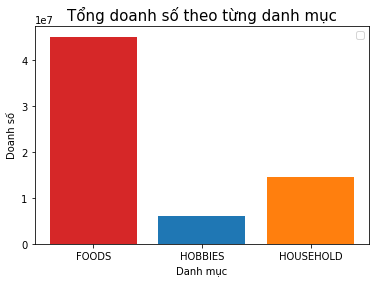

<Figure size 960x960 with 0 Axes>

In [202]:
#Vẽ lưới biểu đồ
fig, ax = plt.subplots()
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

#Vẽ biểu đồ dạng bar
x = Totalsale_Cat['cat_id']
y = Totalsale_Cat['values']
bar_colors = ['tab:red', 'tab:blue', 'tab:orange']

ax.bar(x, y, color=bar_colors)

ax.set_xlabel('Danh mục')
ax.set_ylabel('Doanh số')
ax.set_title('Tổng doanh số theo từng danh mục', fontsize=15)
ax.legend()

plt.show()

**Doanh số hàng tháng ở các cửa hàng khác nhau**

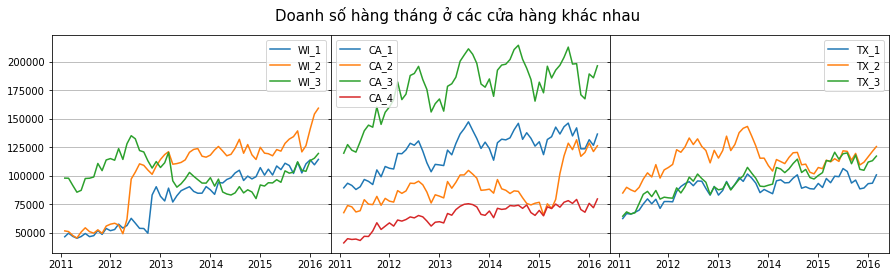

In [203]:
#Nhóm sale2_temp theo cột 'store_id', rồi tính tổng doanh số ở các cột từ cột đầu tiên và trừ 6 cột cuối
sale_Stores = sale2_temp.groupby(['store_id'])[(sale2_temp.columns)[:-6]].sum()
#Lưới biểu đồ có 1 dòng 3 cột
fig, ax = plt.subplots(1, 3, sharey=True, figsize = (15,4))
#Vẽ biểu đồ
for i in range(len(sale_Stores.index)):
    #If s =='W', n = 0
    #If s =='C', n = 1
    #Else n = 2
    n = lambda s : 0 if s == 'W' else (1 if s == 'C' else 2)
    #Giá trị lấy từ mỗi dòng ở cột index, rồi lấy ký tự đầu tiên
    n = n(sale_Stores.index[i][0])
    x = sale_Stores.iloc[i,1:-1]
    label = sale_Stores.index[i]
    ax[n].plot(x,label=label)
    ax[n].grid(b=True,axis='y')
    ax[n].legend(loc='best')    
fig.subplots_adjust( wspace=0.0)
plt.suptitle('Doanh số hàng tháng ở các cửa hàng khác nhau', fontsize=15)
plt.show()

**Doanh số hàng tháng ở các bộ phận khác nhau của 3 tiểu bang**

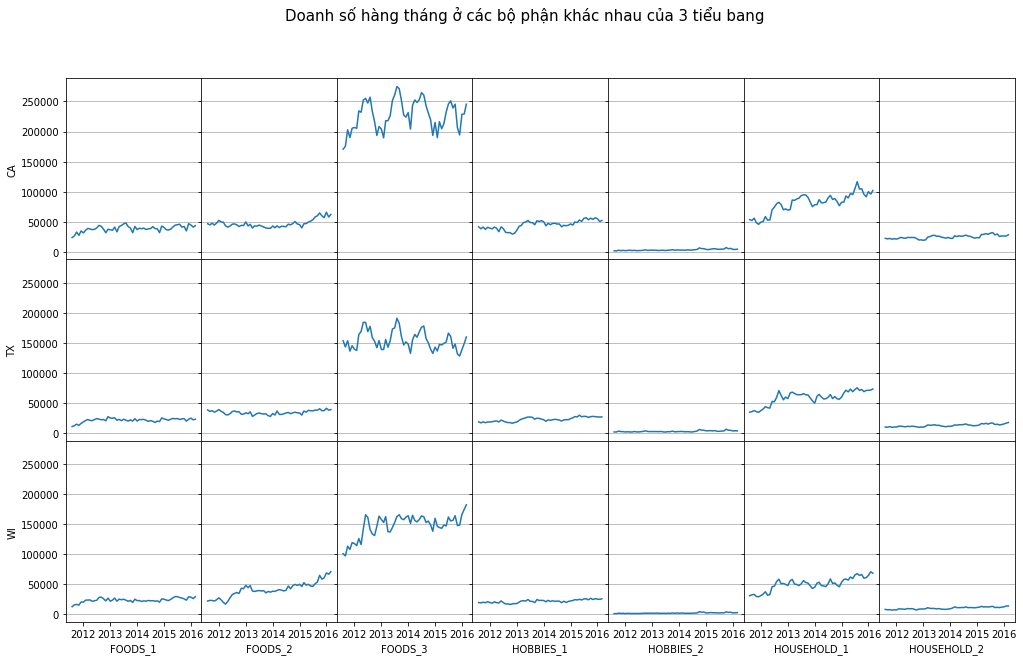

In [204]:
#Nhóm sale2_temp theo cột 'store_id', rồi tính tổng doanh số ở các cột từ cột đầu tiên và trừ 6 cột cuối
sale_state_dept = sale2_temp.groupby(['state_id','dept_id'])[(sale2_temp.columns)[6:]].sum()
#Lưới biểu đồ có 3 dòng 7 cột
fig, ax = plt.subplots(3, 7, sharey=True,sharex=True,figsize = (17,10))
#Vẽ biểu đồ
for i in range(3):
    for j in range(7):
        k = (7*i)+(j)
        ax[i,j].plot(sale_state_dept.iloc[k,1:-1])
        ax[i,j].grid(b=True,axis='y')
        xlabel = sale_state_dept.index[k][1]
        ylabel = sale_state_dept.index[k][0]
        ax[i,j].set(xlabel=xlabel, ylabel=ylabel)
for a in ax.flat:
   a.label_outer()
fig.subplots_adjust( hspace = 0.0,wspace=0.0)
plt.suptitle('Doanh số hàng tháng ở các bộ phận khác nhau của 3 tiểu bang', fontsize = 15)
plt.show()

**Tổng doanh số với dữ liệu giảm nhiễu (trừ ngày lễ lớn 25/12 hàng năm)**

In [205]:
#Xóa những cột có ngày 25/12 hàng năm
smoothSales = sale2.drop(labels=[datetime.date(2011, 12, 25),datetime.date(2012, 12, 25), datetime.date(2013, 12, 25),datetime.date(2014, 12, 25),datetime.date(2015, 12, 25)],axis=1)
smoothSales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,2011-01-29,2011-01-30,2011-01-31,2011-02-01,...,2016-04-15,2016-04-16,2016-04-17,2016-04-18,2016-04-19,2016-04-20,2016-04-21,2016-04-22,2016-04-23,2016-04-24
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [206]:
#Tính tổng ở mỗi cột từ cột thứ 6 trở đi
S = smoothSales.iloc[:,6:].sum()
S.head()
S.shape[0]

1908

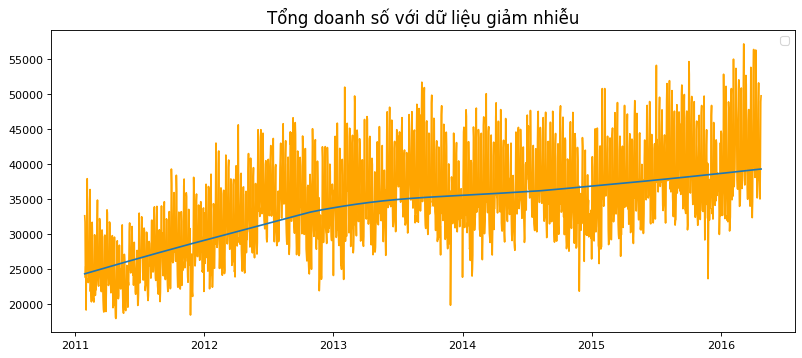

In [207]:
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
#Tính tổng ở mỗi cột từ cột thứ 6 trở đi
S = smoothSales.iloc[:,6:].sum()
z = lowess(S.values, range(S.shape[0]))
#Config size và màu của lưới biểu đồ
plt.figure(num=None, figsize=(12, 5), dpi=80, facecolor='w', edgecolor='k')
#Vẽ biểu đồ
plt.plot(S,color='orange')
plt.plot(pd.Series(z[:,1],S.index))
plt.title('Tổng doanh số với dữ liệu giảm nhiễu', fontsize = 15)
plt.legend()
plt.show()

**Dự đoán thặng dư theo mùa**

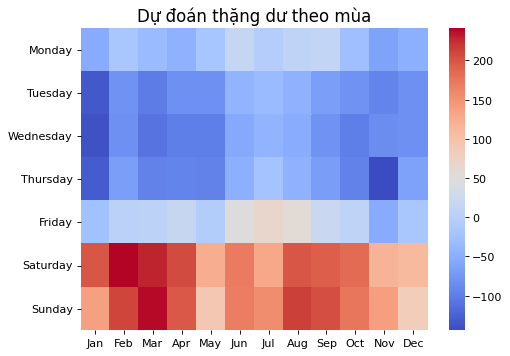

In [208]:
#Lấy giá trị từ cột thứ 6 trở đi, rồi tính tổng mỗi cột
S = smoothSales.iloc[:,6:].sum()
z = lowess(S.values, range(S.shape[0]))
M = S.values - z[:,1]
A = (pd.DataFrame(data=M,index=S.index)).T
A = A.groupby(A.columns.map(lambda x : str(x.weekday())+'-'+str(x.month)),axis=1).sum()

H = np.zeros((7,12))
#Lặp qua 7 ngày
for i in range(7):
  #Lặp qua 12 tháng
    for j in range(12):
        H[i,j] = A[str(i)+'-'+str(j+1)]//1000
        
#Vẽ biểu đồ
import seaborn as sns
#Config size và màu của lưới biểu đồ
plt.figure(None, figsize=(7, 5), dpi=80, facecolor='w', edgecolor='k')
xticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
yticklabels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday' ]
ax = sns.heatmap(H,cmap='coolwarm',xticklabels=xticklabels,yticklabels=yticklabels)
plt.title('Dự đoán thặng dư theo mùa', fontsize = 15)
plt.show()

**Doanh số ở mỗi tiểu bang theo mùa**

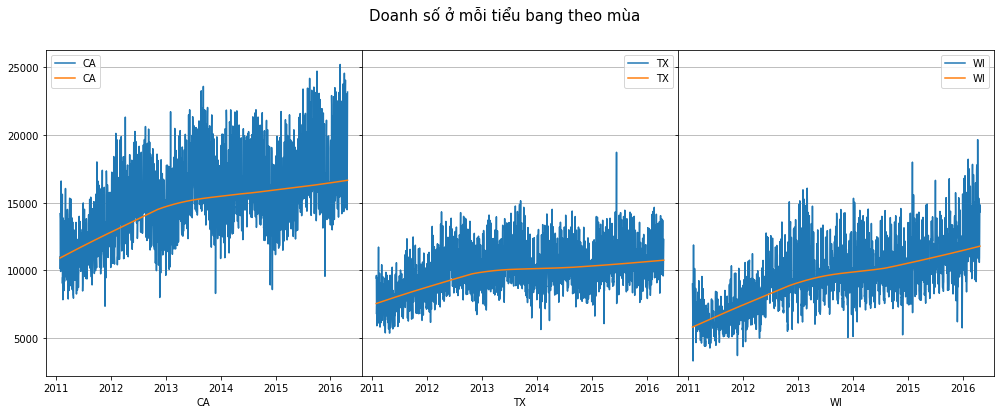

In [209]:
#Nhóm theo state_id, rồi tính tổng ở mỗi cột từ cột thứ 6 trở đi
S = smoothSales.groupby(['state_id'])[(smoothSales.columns)[6:]].sum()

#Config size của biểu đồ, lưới biểu đồ có 1 dòng và 3 cột
fig, ax = plt.subplots(1, 3, sharey=True, figsize = (17,6))
#Vẽ biểu đồ
for i in range(len(S.index)):
    ax[i].plot(S.iloc[i,:],label=S.index[i])
    z = lowess(S.iloc[i,:].values, range(S.shape[1]))
    ax[i].plot(pd.Series(z[:,1],S.columns),label=S.index[i] )
    ax[i].grid(b=True,axis='y')
    ax[i].set_xlabel(S.index[i])
    ax[i].legend(loc='best')

fig.subplots_adjust( wspace=0.0)
plt.suptitle('Doanh số ở mỗi tiểu bang theo mùa', fontsize = 15)
plt.show()

**Doanh số trung bình hàng tuần theo mùa**

In [210]:
#Lấy giá trị từ cột thứ 6 trở đi, tính trung bình tổng doanh thu
mean_sales = S.iloc[:,6:].sum().mean()
A = S
for i in range(len(S.index)):
    z = lowess(S.iloc[i,:].values, range(S.shape[1]))
    A.iloc[i,:] = S.iloc[i,:] - z[:,1]
A = A/mean_sales
A = A.groupby(A.columns.map(lambda x : str(x.weekday())),axis=1).sum()
A

,0,1,2,3,4,5,6
state_id,,,,,,,
CA,-1.404834,-11.256125,-13.919584,-13.529480,0.100727,27.460872,29.983385
TX,-0.683657,-7.627108,-8.106651,-7.559704,-0.637163,15.105139,18.778783
WI,-5.068407,-7.043198,-6.751147,-6.167255,5.129804,19.353920,10.620337


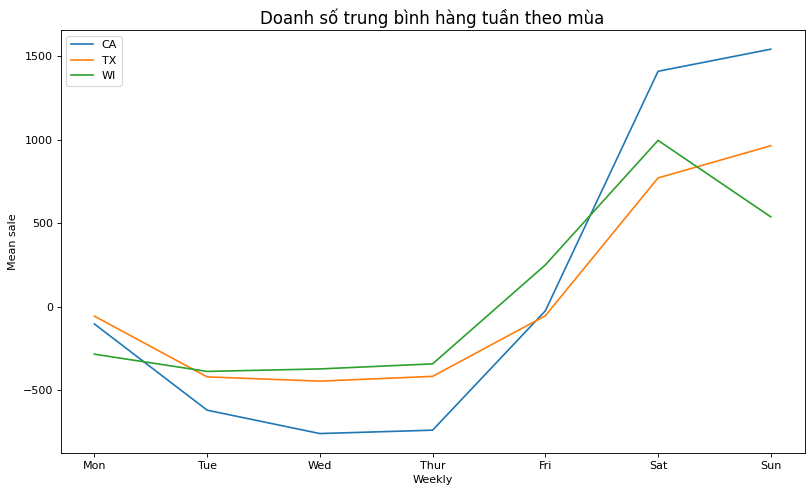

In [211]:
#Lấy giá trị từ cột thứ 6 trở đi, tính trung bình tổng doanh thu
mean_sales = S.iloc[:,6:].sum().mean()
A = S
for i in range(len(S.index)):
    z = lowess(S.iloc[i,:].values, range(S.shape[1]))
    A.iloc[i,:] = S.iloc[i,:] - z[:,1]
A = A/mean_sales
#Nhóm các cột theo ngày trong tuần và tính tổng doanh số mỗi ngày trong tuần
A = A.groupby(A.columns.map(lambda x : str(x.weekday())),axis=1).sum()
#Config size, màu của lưới biểu đồ
plt.figure(num=None, figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
for i in range(3):
    plt.plot(A.iloc[i,:],label=A.index[i])
    plt.xticks(range(0,7),['Mon', 'Tue', 'Wed', 'Thur', 'Fri','Sat','Sun' ])
    plt.xlabel('Weekly')
    plt.ylabel('Mean sale')
    plt.title('Doanh số trung bình hàng tuần theo mùa', fontsize = 15)
    plt.legend(loc='best')

plt.show()

**Doanh số trung bình hàng tháng theo mùa**

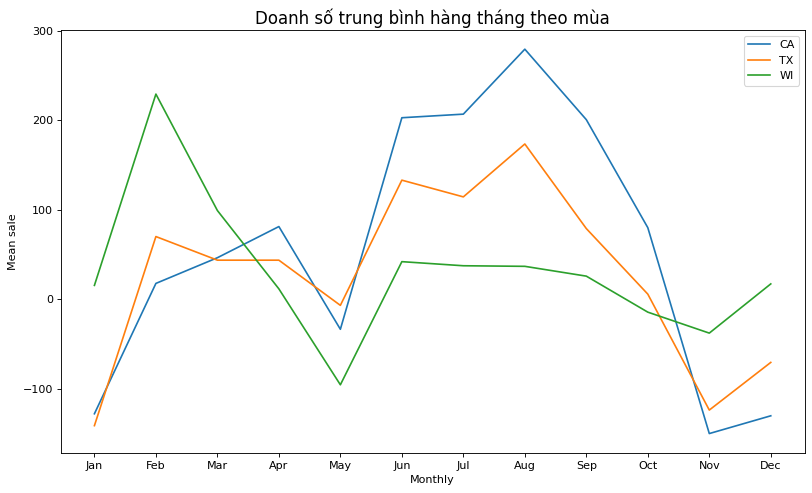

In [212]:
A = S
for i in range(len(S.index)):
    z = lowess(S.iloc[i,:].values, range(S.shape[1]))
    A.iloc[i,:] = S.iloc[i,:] - z[:,1]
A = A/mean_sales
#Nhóm các cột theo tháng và tính tổng doanh số mỗi tháng
A = A.groupby(A.columns.map(lambda x : (x.month)),axis=1).sum()
#Config size, màu của lưới biểu đồ
plt.figure(num=None, figsize=(12,7), dpi=80, facecolor='w', edgecolor='k')
for i in range(len(S.index)):
    plt.plot(A.iloc[i,:],label=A.index[i])
    plt.xlabel('Monthly')
    plt.ylabel('Mean sale')
    plt.xticks(range(1,13),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.legend(loc='best')
plt.title('Doanh số trung bình hàng tháng theo mùa', fontsize = 15)
plt.show()

**Doanh số trung bình hàng tuần và hàng tháng ở mỗi tiểu bang và danh mục**

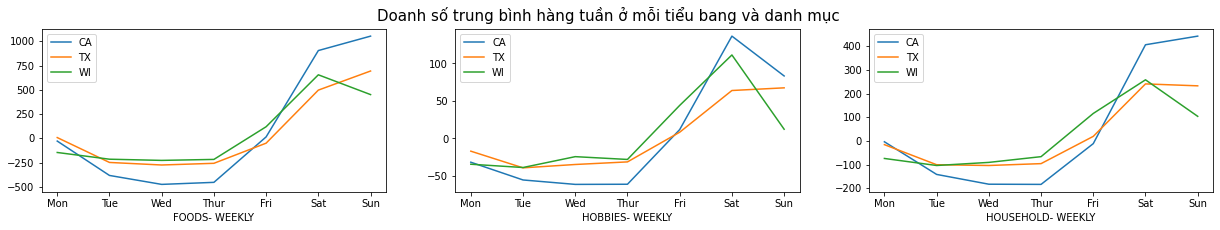

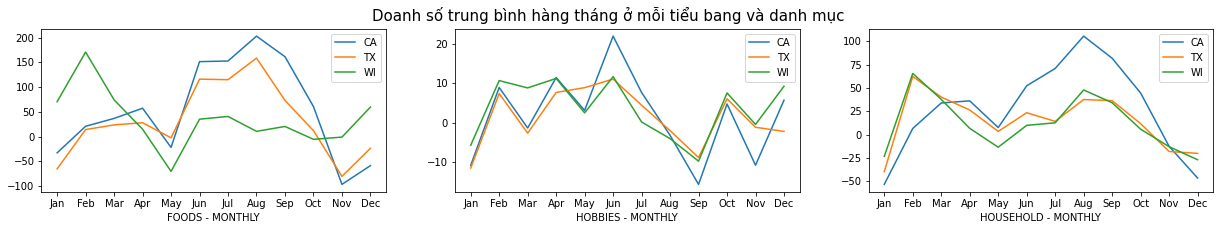

In [213]:
from matplotlib.mathtext import Fonts
#Nhóm theo cột cat_id và state_id, tính tổng giá trị mỗi cột từ cột thứ 6 trở đi
S = smoothSales.groupby(['cat_id','state_id'])[(smoothSales.columns)[6:]].sum()
A = S
for i in range(9):
    z = lowess(S.iloc[i,:].values, range(S.shape[1]))
    A.iloc[i,:] = S.iloc[i,:] - z[:,1]
G = A/mean_sales
#Nhóm các cột theo weekday, rồi tính tổng
A = G.groupby(G.columns.map(lambda x : str(x.weekday())),axis=1).sum()
#Config size và màu của lưới biểu đồ, lưới biểu đồ có 1 dòng 3 cột
fig, ax = plt.subplots(1,3,figsize = (21,3),sharex=True)
#Vẽ biểu đồ theo Weekly
for i in range(9):
    ax[(i//3)].plot(A.iloc[i,:],label=A.index[i][1])
    ax[(i//3)].legend(loc='best')
    ax[i//3].set(xlabel = A.index[i][0]+'- WEEKLY')
plt.xticks(range(0,7),['Mon', 'Tue', 'Wed', 'Thur', 'Fri','Sat','Sun' ])
plt.suptitle('Doanh số trung bình hàng tuần ở mỗi tiểu bang và danh mục', fontsize = 15)
plt.show()

#Nhóm các cột theo month, rồi tính tổng
B = G.groupby(G.columns.map(lambda x : x.month),axis=1).sum()
#Config size và màu của lưới biểu đồ, lưới biểu đồ có 1 dòng 3 cột
fig, ax = plt.subplots(1,3,figsize = (21,3), sharex=True)
#Vẽ biểu đồ theo Monthly
for i in range(9):
    ax[(i//3)].plot(B.iloc[i,:],label=B.index[i][1])
    ax[(i//3)].legend(loc='best')
    ax[i//3].set(xlabel = B.index[i][0]+' - MONTHLY')
plt.xticks(range(1,13),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.suptitle('Doanh số trung bình hàng tháng ở mỗi tiểu bang và danh mục', fontsize = 15)
plt.show()

**Số ngày có sự kiện với ngày không có sự kiện**

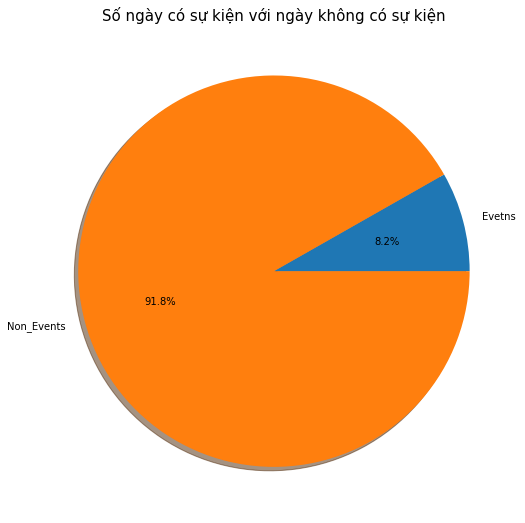

In [214]:
#Số ngày không có sự kiện = tổng số ngày - số ngày có sự kiện
Non_events = cale4.date.count() - cale4.event_name_1.count()
#Số ngày có sự kiện
Events = cale4.event_name_1.count()
labels = ['Evetns','Non_Events']
fracs = [Events, Non_events]

# Vẽ lưới biểu đồ
fig, axs = plt.subplots(1, 1, figsize=(9,9))
# Vẽ biểu đồ pie
axs.pie(fracs, labels=labels, autopct='%1.1f%%', shadow=True)
axs.set_title('Số ngày có sự kiện với ngày không có sự kiện', fontsize = 15)
#pd.Series([Non_events,Events], ['Non_Events',"Evetns"],name="").plot.pie(autopct='%1.1f%%')
plt.show()

**Số ngày của mỗi loại sự kiện**

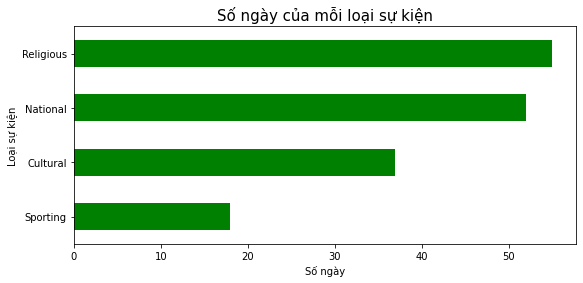

In [215]:
#Nhóm các ngày cùng loại sự kiện 'event_type_1' với nhau, sau đó xắp xếp tăng dần
F = cale4.groupby(['event_type_1']).count().iloc[:,1].sort_values(ascending=True)
#Vẽ biểu đồ barh 
fig, axs = plt.subplots(1, 1, figsize=(9,4))
F.plot.barh(color='green')
plt.xlabel('Số ngày')
plt.ylabel('Loại sự kiện')
plt.title('Số ngày của mỗi loại sự kiện', fontsize = 15)
plt.show()

**Số ngày SNA trong mỗi tháng của các tiểu bang khác nhau**

In [216]:
#Import các thư viện cần dùng
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Khởi tạo các biến và set giá trị
years = [2012] 
weeks = [1, 2, 3, 4, 5, 6]
days = ['M', 'T', 'W', 'T', 'F', 'S', 'S']
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
               'September', 'October', 'November', 'December']

#Hàm generate_data
def generate_data():
    idx = pd.date_range('2012-01-01', periods=182, freq='D')
    return pd.Series(range(len(idx)), index=idx)


#Hàm split_months
def split_months(df, year):
    """
    Take a df, slice by year, and produce a list of months,
    where each month is a 2D array in the shape of the calendar
    :param df: dataframe or series
    :return: matrix for daily values and numerals
    """
    df = df[df.index.year == year]


    # Empty matrices
    a = np.empty((6, 7))
    a[:] = np.nan

    day_nums = {m:np.copy(a) for m in range(1,7)}  # matrix for day numbers
    day_vals = {m:np.copy(a) for m in range(1,7)}  # matrix for day values

    # Logic to shape datetimes to matrices in calendar layout
    for d in df.iteritems():  # use iterrows if you have a DataFrame

        day = d[0].day
        month = d[0].month
        col = d[0].dayofweek

        if d[0].is_month_start:
            row = 0

        day_nums[month][row, col] = day  # day number (0-31)
        day_vals[month][row, col] = d[1] # day value (the heatmap data)

        if col == 6:
            row += 1

    return day_nums, day_vals


#Hàm create_year_calendar thực hiện vẽ Calendar
def create_year_calendar(day_nums, day_vals, X, name):
    fig, ax = plt.subplots(1, 6, figsize=(20, 12))

    for i, axs in enumerate(ax.flat):

        axs.imshow(day_vals[i+1], cmap='viridis', vmin=1, vmax=365)  # heatmap
        axs.set_title(month_names[i])

        # Labels
        axs.set_xticks(np.arange(len(days)))
        axs.set_xticklabels(days, fontsize=10, fontweight='bold', color='#FFFFFF')
        axs.set_yticklabels([])

        # Tick marks
        axs.tick_params(axis=u'both', which=u'both', length=0)  # remove tick marks
        axs.xaxis.tick_top()

        # Modify tick locations for proper grid placement
        axs.set_xticks(np.arange(-.5, 6, 1), minor=True)
        axs.set_yticks(np.arange(-.5, 6, 1), minor=True)
        axs.grid(which='minor', color='w', linestyle='-', linewidth=2.1)

        # Despine
        for edge in ['left', 'right', 'bottom', 'top']:
            axs.spines[edge].set_color('white')

        # Annotate
        for w in range(len(weeks)):
            for d in range(len(days)):
                day_num = day_nums[i+1][w, d]
                if not np.isnan(day_num):    # Value label
                    axs.text(d, w, f"{day_num:0.0f}",
                             ha="center", va="center",
                             fontsize=15, color="k", alpha=0.8)
                    patch_coords = ((d - 0.5, w - 0.5),
                                    (d - 0.5, w + 0.5),
                                    (d + 0.5, w + 0.5),
                                    (d + 0.5, w - 0.5))
                    if datetime.datetime.strptime(str(years[0])+'-'+str(i+1)+'-'+str(int(day_num)), '%Y-%m-%d').date().strftime('%Y-%m-%d') in X:
                        square = Polygon(patch_coords, fc='gold')  #FF4500
                        axs.add_artist(square)
                    else:
                        square = Polygon(patch_coords, fc='#DDDDDD')
                        axs.add_artist(square)

    # Final adjustments
    fig.suptitle(name + ' 2012', fontsize=20)
    plt.subplots_adjust(left=0.04, right=0.96, top=1, bottom=0.65)
    plt.show()

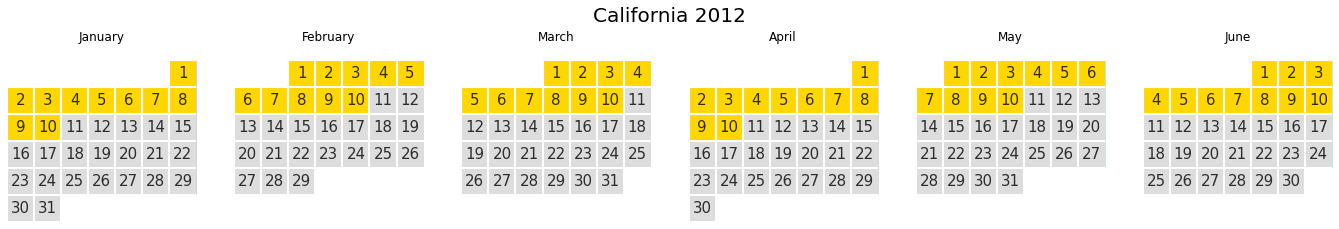

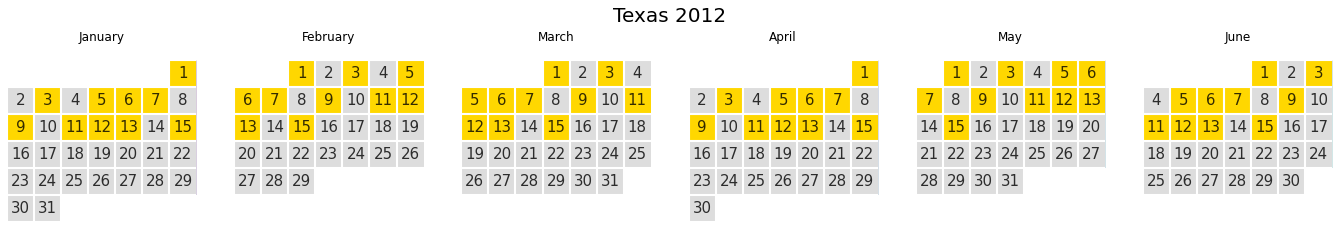

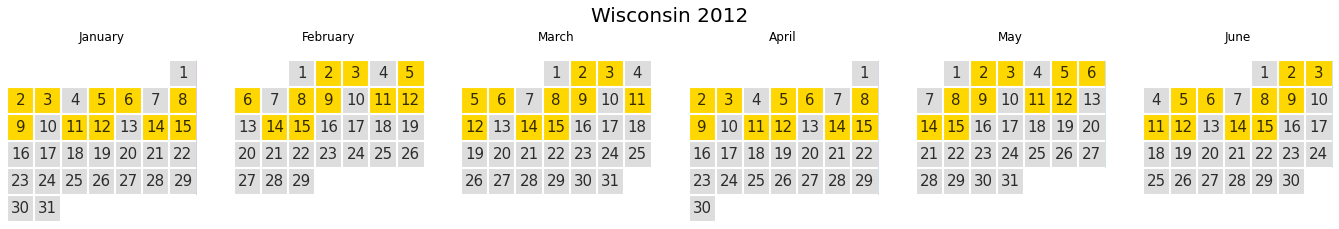

In [217]:
#Số ngày SNA của tiểu bảng California
CA = cale4.date[cale4.snap_CA == 1].values
#Số ngày SNA của tiểu bảng Texas
TX = cale4.date[cale4.snap_TX == 1].values
#Số ngày SNA của tiểu bảng Wisconsin
WI = cale4.date[cale4.snap_WI == 1].values
df = generate_data()
day_nums, day_vals = split_months(df,2012)
#Gọi hàm create_year_calendar với các tham số
create_year_calendar(day_nums, day_vals,CA,'California')
create_year_calendar(day_nums, day_vals,TX,'Texas')
create_year_calendar(day_nums, day_vals,WI,'Wisconsin')

**Giá các mặt hàng phân phối theo các bộ phận khác nhau của ba tiểu bang**

In [218]:
#Dataframe prices được nhóm theo store_id
A=prices.groupby([prices.store_id.str.slice(0,-2),prices.item_id.str.slice(0,-4)])
#Tạo list B
B = []
for name, group in A:
    B.append(name)

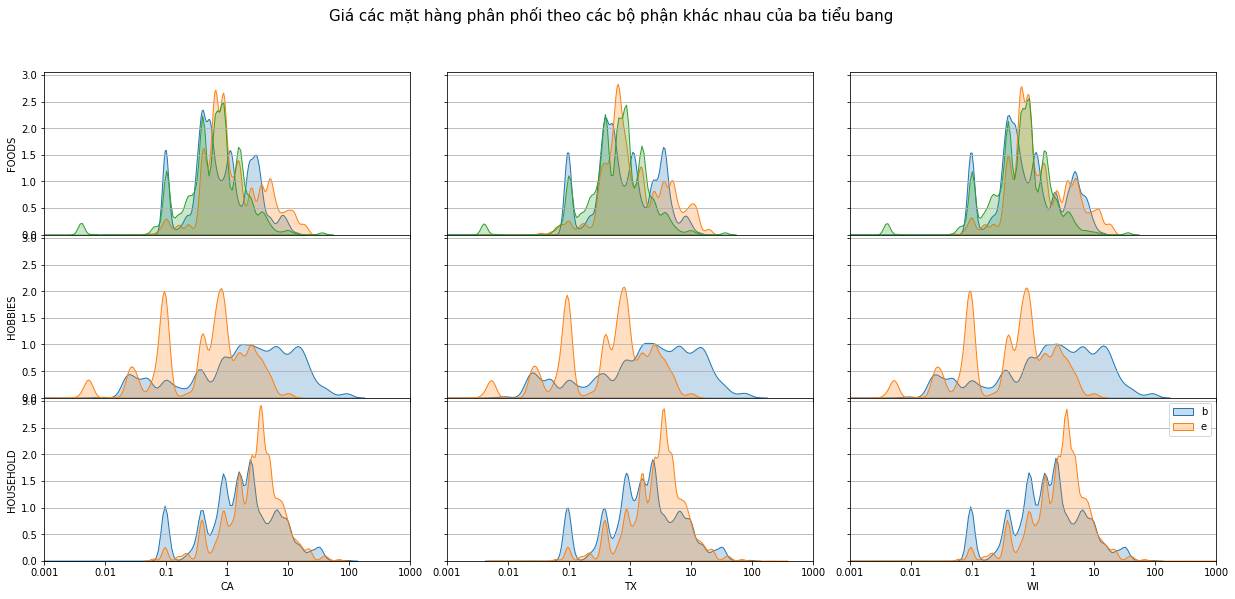

In [219]:
import seaborn as sns
#Vẽ lưới đồ thị có 3 dòng 3 cột và config size
fig, ax = plt.subplots(3,3,sharey=True,sharex=True, figsize=(21,9))
k=0
for j in range(3):
    for i in range(0,1):
        sns.kdeplot(np.log10(A.get_group(B[k])['sell_price']),legend=False,bw_method=0.1,shade=True,ax=ax[i,j])
        sns.kdeplot(np.log10(A.get_group(B[k+1])['sell_price']),legend=False,bw_method=0.1,shade=True,ax=ax[i,j])
        sns.kdeplot(np.log10(A.get_group(B[k+2])['sell_price']),legend=False,bw_method=0.1,shade=True,ax=ax[i,j])
        ax[i,j].grid(b=True,axis='y')
        ax[i,j].set(xlabel = 'CA' if j==0 else('TX' if j==1 else'WI'), ylabel ="FOODS")
    for i in range(1,2):
        sns.kdeplot(np.log10(A.get_group(B[k+3])['sell_price']),legend=False,bw_method=0.1,shade=True,ax=ax[i,j])
        sns.kdeplot(np.log10(A.get_group(B[k+4])['sell_price']),legend=False,bw_method=0.1,shade=True,ax=ax[i,j])
        ax[i,j].grid(b=True,axis='y')
        ax[i,j].set(xlabel = 'CA' if j==0 else('TX' if j==1 else'WI'),ylabel = "HOBBIES")
    for i in range(2,3):
        sns.kdeplot(np.log10(A.get_group(B[k+5])['sell_price']),legend=False,bw_method=0.1,shade=True,ax=ax[i,j])
        sns.kdeplot(np.log10(A.get_group(B[k+6])['sell_price']),legend=False,bw_method=0.1,shade=True,ax=ax[i,j])
        ax[i,j].grid(b=True,axis='y')
        ax[i,j].set(xlabel = 'CA' if j==0 else('TX' if j==1 else'WI'),ylabel ="HOUSEHOLD")
    k=k+7
fig.canvas.draw()
loc,labels = plt.xticks()
for ax in ax.flat:
    ax.label_outer()
    ax.set_xlim(-1,2)
    ax.set_xticklabels([10 ** int(i.get_text().replace(u'\u2212', '-')) for i in labels])
fig.subplots_adjust( hspace = 0.0,wspace=0.1)
plt.suptitle('Giá các mặt hàng phân phối theo các bộ phận khác nhau của ba tiểu bang', fontsize=15)
plt.legend('best')
plt.show()